In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [4]:
from sklearn.datasets import make_blobs
from sklearn import decomposition

In [6]:
X1,Y1=make_blobs(n_features=10,n_samples=100,centers=4,random_state=4,cluster_std=1)
print(X1.shape)
print(Y1.shape)

(100, 10)
(100,)


In [11]:
matrix=X1
df=pd.DataFrame(matrix,index=range(matrix.shape[0]),columns=range(matrix.shape[1]))
print(len(df.columns))
df['y']=Y1
print(len(df.columns))

10
11


In [13]:
df.rename(columns={0:'x1',1:'x2',2:'x3',3:'x4',4:'x5',5:'x6',6:'x7',7:'x8',8:'x9',9:'x10'},inplace=True)
print(df.columns)

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'y'], dtype='object')


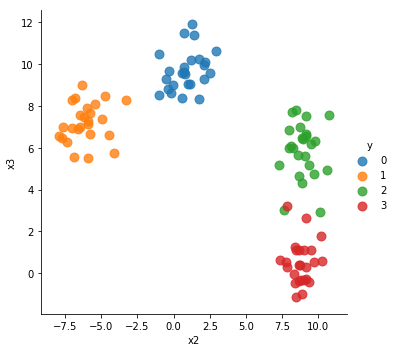

In [21]:
sns.lmplot(x='x2',y='x3',data=df,fit_reg=False,hue='y',legend=True,scatter_kws={"s":80})

In [22]:
pca=decomposition.PCA(n_components=4)
pc=pca.fit_transform(X1)


In [24]:
df=pd.DataFrame({'Varianza':pca.explained_variance_ratio_,'Componente':['PC1','PC2','P31','PC4']})
df
    

,Varianza,Componente
0,0.445205,PC1
1,0.362620,PC2
2,0.169061,P31
3,0.005475,PC4


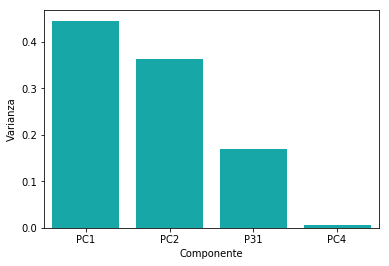

In [26]:
plt.figure()
sns.barplot(x='Componente',y='Varianza',data=df,color='c')


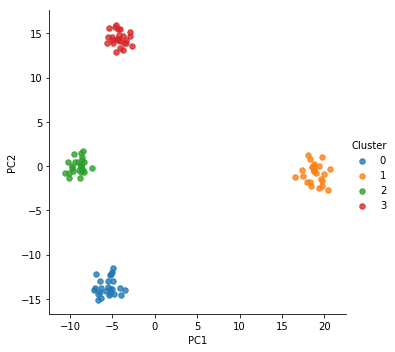

In [30]:
pc_df=pd.DataFrame(data=pc,columns=['PC1','PC2','PC3','PC4'])
pc_df['Cluster']=Y1

sns.lmplot(x="PC1",y="PC2",data=pc_df,fit_reg=False,hue='Cluster',legend=True,scatter_kws={"s":30})